## Импорт библиотек и загрузка датасетов

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = pd.read_csv("./data/iris.csv")
iris.head() # Выводим первые пять записей для проверки корректности загрузки датасета

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
penguins = pd.read_csv("./data/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Задание 1

**Описание задачи:**  
Проверить, соответствует ли распределение длины лепестков (petal length) вида Iris setosa нормальному распределению с помощью критерия Шапиро-Уилка.

Перед проверкой критерия можно посмотреть на гистограмму относительных частот и визуально сравнить с нормальным распределением.

C:\Users\Sai\AppData\Local\Temp\ipykernel_8068\876636406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(setosa_petal_length, kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})


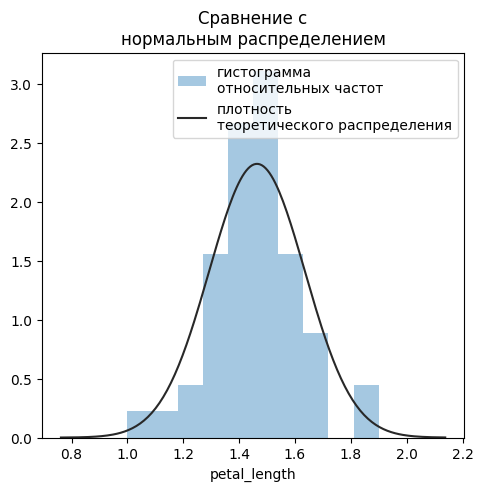

In [24]:
setosa_petal_length = iris.loc[iris.variety == "Iris-setosa", "petal_length"]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(setosa_petal_length, kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nнормальным распределением')
plt.legend()

Визуально распределение имеет вид близкое к нормальному.

**Формула статистики критерия Шапиро-Уилки:**
$$
W=\frac{1}{\sum_{i=1}^{n}x_{i}-\overline{x}}\Biggl(\sum_{i=1}^{k}a_{x-i+1}(x_{n-i+1}-x_{i})\Biggr)^2
$$

Для подсчёта статистики критерия будем использовать библиотеку scipy.  
Докумнтация scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  

Согластно документации метод shapiro(x) позволяет проверить гиппотезу H0 о том, что данные в выборке были получены из нормального распределения. В нашем случае это означает:

**Гипотеза H0** - распределение длинн лепестков вида Iris-setosa в генеральной совокупности соответствует нормальному закону распределению.  

**Гипотеза H1** - распределение длинн лепестков вида Iris-setosa в генеральной совокупности не соответствует нормальному закону распределению.

**Примем уровень значимости α = 0.05**

In [25]:
stat, p = sts.shapiro(setosa_petal_length)
print(f"Statistics = {stat:.03f}, p-value={p:.03f}")

Statistics = 0.955, p-value=0.055


Так как pvalue > α у нас недостаточно оснований для того чтобы отвергнуть H0.  

В документации scipy сказано, что этот критерий не используется для доказательства нормальности распределения, а может быть использован только лишь для опровержения. 

Однако, если принять гипотезу H0 мы можем совершить ошибку второго рода.  
Вероятность ошибки второго рода β. 1 - β - мощность критерия.

Мощность критерия Шапиро-Уилки определяется в зависимости от гипотезы H1 и для n≈50 может быть как меньше 0.15, так и более 0.4.   
Источник:
https://ami.nstu.ru/~headrd/seminar/publik_html/guid_normal_tets.pdf  

**Вывод: используя критерий Шапиро-Уилки не удалось отвергнуть гипотезу о том, что выборка длинн лепестков получена из нормального закона распределения.**

## Задание 2

**Описание задачи:**  
Проверить, есть ли статистически значимая разница в возрасте пассажиров мужчин и женщин на Титанике, используя t-критерий Стьюдента.

Перед проверкой посмотрим на распределение значений:

Text(0, 0.5, 'Плотность')

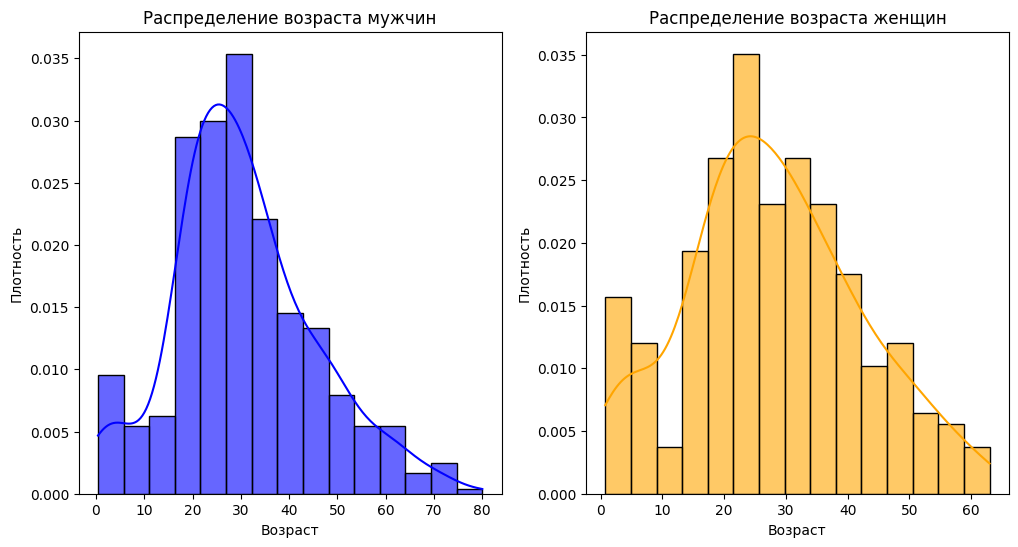

In [29]:
age_male_passengers = titanic.loc[titanic.Sex == "male", "Age"].dropna()
age_female_passengers = titanic.loc[titanic.Sex == "female", "Age"].dropna()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(age_male_passengers, bins=15, kde=True, color='blue', stat='density', alpha=0.6)
plt.title('Распределение возраста мужчин')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)
sns.histplot(age_female_passengers, bins=15, kde=True, color='orange', stat='density', alpha=0.6)
plt.title('Распределение возраста женщин')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

По визуальной оценке распределение возраста в выборках **отличается от нормального** распределения: эксцесс и асимметрия отличны от нуля. Визуально распределение ближе к логнормальному.

Проблема в том, что t-критерий Стьюдента можно использовать только для данных, имеющих нормальное распределение. Если данные имеют распределение отличное от нормального, то проверять t-критерий не имеет смысла. 

**Проверим гипотезы $H0_m$ и $H0_f$ о том, что возраст мужчин-пассажиров и женщин-пассажиров в генеральной совокупности распределён нормально.**

Альтернативными гипотезами $H1_m$ и $H1_f$ будут гипотезы о том, что данные распределения отличны от нормального.  
Примем уровень значимости α = 0.05

In [31]:
stat, p = sts.shapiro(age_male_passengers)
print("Критерий Шапиро-Уилка для мужчин")
print(f"Statistics = {stat:.03f}, p-value={p:.03f}")

stat, p = sts.shapiro(age_female_passengers)
print("Критерий Шапиро-Уилка для женщин")
print(f"Statistics = {stat:.03f}, p-value={p:.03f}")

Критерий Шапиро-Уилка для мужчин
Statistics = 0.975, p-value=0.000
Критерий Шапиро-Уилка для женщин
Statistics = 0.985, p-value=0.007


Так как p-value в обоих случаях меньше уровня значимости α yektdst нулевые гипотезы отвергаются.  
Принимаются альтернативные гипотезы $H1_m$ и $H1_f$. 

Вследствие чего использовать t-критерий для сравнения средних значений не имеет смысла, т.к. невыполнены ограничения  
t-критерия.

В качестве альтернативы можно сравнить распределения используя U-критерий Манна-Уитни (будем считать что выборки независимы).

Нулевая гипотеза $H0$ - выборка возраста мужчин и женщин взяты из одного распределения

Альтернативная гипотеза $H1$ - медианные возраста мужчин и женщин не равны.

Примем уровень значимости α = 0.05

In [39]:
stat, p_value = sts.mannwhitneyu(age_male_passengers, age_female_passengers, alternative='two-sided')
print(f"Statistics = {stat:.03f}, p-value={p:.03f}")

Statistics = 65020.500, p-value=0.007


p-value < α, поэтому нулевая гипотеза отвергается и принимается альтернативная.

**Вывод: t-критерий Стьюдента для оценки средних значений возраста мужчин и женщин не имеет смысла, однако используя U-критерий Манна-Уитни можно отвергнуть гипотезу о том, что  распределения**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

https://habr.com/ru/companies/avito/articles/709596/